In [1]:
import time
start_time = time.perf_counter()

## Versions, housekeeping

In [2]:
%matplotlib inline
# version check
import numpy
print('The numpy version is {}.'.format(numpy.__version__))
import pandas
print('The pandas version is {}.'.format(pandas.__version__))
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))
import matplotlib
print('The matplotlib version is {}.'.format(matplotlib.__version__))
import regex
print('The regex version is {}.'.format(regex.__version__))
import scipy
print('The scipy version is {}.'.format(scipy.__version__))

The numpy version is 1.18.1.
The pandas version is 1.0.4.
The scikit-learn version is 0.23.1.
The matplotlib version is 3.2.1.
The regex version is 2.5.80.
The scipy version is 1.4.1.


In [3]:
# set random state for reproducibility
random_state = 42

# view number of output entries
view_n_entries = 5

# default numpy settings
import numpy as np
np.set_printoptions(edgeitems=3)
np.core.arrayprint._line_width = 80

# update settings
import numpy as np
np.set_printoptions(edgeitems=15, linewidth=150, 
    formatter=dict(float=lambda x: "%.2f" % x))

# update pandas settings
import pandas as pd
pd.set_option('max_colwidth', 200)
pd.options.display.max_columns = 50
pd.options.display.max_rows = 150
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# system
import sys
#sys.getsizeof

# timeit
import timeit

## Plotting Functions

In [4]:
# plotting functions
import numpy as np
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("notebook")

def just_character_counts(df, col='m_body'):
    A = np.array(df.loc[:, col]) 
    getlength = np.vectorize(len)
    _ = getlength(A)
    _ = np.sum(_)
    return _

def get_character_counts(df, col='m_body', new_name='n_char'):
    A = np.array(df.loc[:, col]) 
    getlength = np.vectorize(len)
    df[new_name] = getlength(A)
    return df

def plot_ecdf(x, xlab='', ylab='', title='', color=None, xlim=None, ylim=None, logx=False, logy=False, hline=None, vline=None, alpha=1, s=1):
    x = np.sort(x)
    n = x.size
    y = np.arange(1, n+1) / n
    plt.scatter(x, y, color=color, s=s, alpha=alpha)
    plt.xlabel(xlab, fontsize=14)
    plt.ylabel(ylab, fontsize=14)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.title(title)
    if logx == True:
        plt.xscale('log')
    if logy == True:
        plt.yscale('log')
    if hline is not None:
        plt.axhline(hline, color='r', linestyle='--')
    if vline is not None:
        plt.axvline(vline, color='r', linestyle='--')

def plot_scatter(x, y, xlab='', ylab='', title='', logx=False, logy=False, hline=None, vline=None, s=None):
    plt.scatter(x, y, alpha=0.25)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    if logx == True:
        plt.xscale('log')
    if logy == True:
        plt.yscale('log')
    if hline is not None:
        plt.axhline(hline, color='r', linestyle='--')
    if vline is not None:
        plt.axvline(vline, color='r', linestyle='--')

def plot_2_2(x, y, suptitle='', hline=None, vline=None):
    plt.figure(figsize=(10,10))

    plt.subplot(2, 2, 1)
    plot_scatter(x, y, xlab='', ylab='', title='Plot 1: linx, liny', logx=False, logy=False, hline=None, vline=None)
    plt.subplot(2, 2, 2)
    plot_scatter(x, y, xlab='', ylab='', title='Plot 2: linx, logy', logx=False, logy=True, hline=None, vline=None)
    plt.subplot(2, 2, 3)
    plot_scatter(x, y, xlab='', ylab='', title='Plot 3: linx, liny', logx=True, logy=False, hline=None, vline=None)
    plt.subplot(2, 2, 4)
    plot_scatter(x, y, xlab='', ylab='', title='Plot 4: linx, logy', logx=True, logy=True, hline=None, vline=None)

    plt.suptitle(suptitle, fontsize=16)
    plt.show() 

def plot_2_4(_, suptitle='', hline=None, vline=None):
    plt.figure(figsize=(20,10))

    plt.subplot(2, 4, 1)
    _.plot(kind='hist', bins=30, title='Plot 1: linx, liny', logx=False, logy=False)
    plt.subplot(2, 4, 2)
    _.plot(kind='hist', bins=30, title='Plot 2: linx, logy', logx=False, logy=True)
    plt.subplot(2, 4, 3)
    plot_ecdf(_, xlab='', ylab='', title='Plot 3: linx, liny', logx=False, logy=False, hline=None, vline=None)
    plt.subplot(2, 4, 4)
    plot_ecdf(_, xlab='', ylab='', title='Plot 4: linx, logy', logx=False, logy=True, hline=None, vline=None)
    plt.subplot(2, 4, 5)
    _.plot(kind='hist', bins=30, title='Plot 5: logx, liny', logx=True, logy=False)
    plt.subplot(2, 4, 6)
    _.plot(kind='hist', bins=30, title='Plot 6: logx, logy', logx=True, logy=True)
    plt.subplot(2, 4, 7)
    plot_ecdf(_, xlab='', ylab='', title='Plot 7: logx, liny', logx=True, logy=False, hline=None, vline=None)
    plt.subplot(2, 4, 8)
    plot_ecdf(_, xlab='', ylab='', title='Plot 8: logx, logy', logx=True, logy=True, hline=None, vline=None)
    plt.suptitle(suptitle, fontsize=16)
    plt.show()   

    
def plot_sender_stats(df, n, suptitle=''):
    plt.figure(figsize=(14, 12))
    plt.subplot(2, 2, 1) # plot 1: horizontal bar
    _ = pd.DataFrame(df.groupby(['m_from']).size()).sort_values(0,ascending=False).reset_index() # convert data
    l = np.array(_.iloc[:,0]) # labels
    v = np.array(_.iloc[:,1]) # values
    plt.barh(np.linspace(n,1,n), v[:n], tick_label=l[:n])
    plt.subplot(2, 2, 2) # plot 2: full histogram
    plt.hist(v, bins=30)
    plt.yscale('log')
    plt.subplot(2, 2, 3) # plot 3: pie
    pie_x = [len(df[df.gender == 0].m_from.unique()), len(df[df.gender == 1].m_from.unique())]
    pie_lab = ['boy: %d email addresses' % (pie_x[0]), 'girl: %d email addresses' % (pie_x[1])]
    plt.pie(pie_x, labels=pie_lab, autopct='%.2f%%', colors=['#347DC1', '#FF85A2'])
    plt.subplot(2, 2, 4) # plot 4: ecdf
    plot_ecdf(v, xlim=(0,stats.scoreatpercentile(v,95)))
    plt.suptitle(suptitle)
    plt.show()
    print(_.describe())
    print(stats.describe(v))
    
def plot_character_frequency(df, suptitle=''):
    v = np.array(df.n_characters_start.values) # values
    plt.figure(figsize=(18,6))
    plt.subplot(1, 3, 1) # plot 1: pie chart
    pie_x = [df[df.gender == 0].n_characters_start.sum(),df[df.gender == 1].n_characters_start.sum()]
    pie_lab = ['boy: %.3g characters' % (pie_x[0]), 'girl: %.3g characters' % (pie_x[1])]
    plt.pie(pie_x, labels=pie_lab, autopct='%.2f%%', colors=['#347DC1', '#FF85A2'])
    plt.subplot(1, 3, 2) # plot 2: full histogram
    plt.hist(v, bins=30)
    plt.yscale('log')
    plt.subplot(1, 3, 3) # plot 3: ecdf
    plot_ecdf(v, xlim=(0,stats.scoreatpercentile(v,95)))
    plt.show()
    print(df.n_characters_start.describe())
    print(stats.describe(v))
    

    
def plot_gender_character_frequency(df, col='m_body', new_name='n_char', suptitle='', alpha=0.1,):
    df = get_character_counts(df, col=col, new_name=new_name)
    bv = np.array(df[df.gender == 0][new_name].values) # values
    gv = np.array(df[df.gender == 1][new_name].values) # values
    plt.figure(figsize=(18,6))
    plt.subplot(1, 3, 1) # plot 1: pie chart
    pie_x = [np.sum(bv), np.sum(gv)]
    pie_lab = ['boy: %dM characters' % (pie_x[0]/1000000), 'girl: %dM characters' % (pie_x[1]/1000000)]
    plt.pie(pie_x, labels=pie_lab, autopct='%.2f%%', colors=['#347DC1', '#FF85A2'])
    plt.subplot(1, 3, 2) # plot 2: full histogram
    plt.hist(x=[bv, gv], bins=10, color=['#347DC1', '#FF85A2'], rwidth=1,)
    #plt.hist(gv, bins=30, color='#FF85A2')
    plt.yscale('log')
    plt.subplot(1, 3, 3) # plot 3: ecdf
    plot_ecdf(bv, xlim=(0,stats.scoreatpercentile(bv,97)), color='#347DC1', alpha=.5, s=.1)
    plot_ecdf(gv, xlim=(0,stats.scoreatpercentile(gv,97)), color='#FF85A2', alpha=.25, s=.1)
    plt.suptitle(suptitle.upper())
    plt.tight_layout()
    plt.show()
    
    bd = df[df.gender == 0][new_name].describe()
    bd.name = 'boy'
    gd = df[df.gender == 1][new_name].describe()
    gd.name = 'girl'
    bg_describe = pd.concat([bd, gd], axis=1)
    print(bg_describe)

### Threadpool executor for this notebook's user functions

In [5]:
%%time
def threadpool_executor(io_func=None, df=None, series=None, merge_back=False, idict=None, new_name=None):
    """Use this to pass a dataframe series to the threadpool executor to trigger async processessing. Make sure the user function (io_func) meets the following conditions:
    - Receives two arguments: series index position & series values
    - Has an output dictionary that assembles the index, values as key, values for reassembly
    - Output dictionary is set as the return by name within the called function
    
    io_func: user function to pass to threadpoolexecutor; df: dataframe with data; series: string name of column; idict: dictionary linked to user function to catch output values; new_name: string for new column name
    when reassigning values back to the main dataframe"""
    
    if (io_func is None) | (df is None) | (series is None):
        sys.exit("'None' received as input for either io_func, df, or series. Please assign a value and try again.")
    if (merge_back is True) & (idict is None):
        sys.exit("'merge_back is set to True. However, no dictionary has been passed to capture output. Please set the idict= argument to an initialized dictionary and try again.'")
    
    import concurrent.futures
    with concurrent.futures.ThreadPoolExecutor() as executor:  
        executor.map(io_func, df[series].index, df[series])
    
    if merge_back == True: # will merge the processed values back to the initial dataframe
        if idict is not None:
            new_frame = pd.DataFrame.from_dict(idict, orient='index')
            if new_name is not None:
                new_frame.columns = [new_name]
                df = pd.merge(df, new_frame, how='left', left_index=True, right_index=True, copy=False)
            else:
                sys.exit("Merge back is True, but no series or name for a new column has been received. If a new column is desired, please pass a new_name. Otherwise, please pass, 'series' to merge_back to replace the current series.")
    if merge_back == 'series': # will drop the old series and replace it with the new processed documents
        df = df.drop(series, axis=1)
        new_frame = pd.DataFrame.from_dict(idict, orient='index')
        new_frame.columns = [series]
        df = pd.merge(df, new_frame, how='left', left_index=True, right_index=True, copy=False)
            
    return df

Wall time: 0 ns


# Notebook Overview
In this notebook we'll remove URLs and stopwords prior to processing.

## User functions for this notebook

### URL strings

In [6]:
http = re.compile('http://[\S]+', flags=re.I)
https = re.compile('https://[\S]+', flags=re.I)

def url_function(doc_idx, doc):
    """Pass document (or pandas .apply() to corpus column) to split on the above pattern"""
    try:
        doc = re.sub(https, ' ', doc)
    except:
        pass
    try:
        doc = re.sub(http, ' ', doc)
    except:
        pass
    
    returns_dict[doc_idx] = doc

## Email address string

In [7]:
email_address = re.compile(r'\b\S+?@\S+\b', flags=re.I)

def email_address_function(doc_idx, doc):
    """Pass document (or pandas .apply() to corpus column) to split on the above pattern"""
    try:
        doc = re.sub(email_address, ' ', doc)
    except:
        pass
    
    returns_dict[doc_idx] = doc

In [8]:
remove_colon_list = ['from', 'facsimile', 'phone', 'mailto', 'tel', 'tel.', 'when', 'where', 'e-mail']

"""Pass document (or pandas .apply() to corpus column) to split on the above pattern"""
def colon_string_function(doc_idx, doc):

    for i in remove_colon_list:    
        remove_colon_pattern = r'\n[^\n]*?' + i + r':[^\n]*?\n'
        try:
            doc = re.sub(remove_colon_pattern, ' ', doc, flags=re.I)
        except:
            pass

    returns_dict[doc_idx] = doc

# Import dataframe

In [9]:
df = pd.read_csv('./data/enron/clean_clean_by_splits.csv', index_col=0)

In [10]:
df.head(2)

,f_dir,m_id,m_date,m_from,m_to,m_cc,m_bcc,m_subj,mime_vers,cont_type,encode,x_from,x_to,x_cc,x_bcc,x_fold,x_orig,x_fname,o_body,m_body,gender,n_emails_sent,n_characters_start,clean_body,clean_char
0,./data/enron/maildir/jones-t/all_documents/3628,<3274354.1075847000730.JavaMail.evans@thyme>,"Wed, 6 Sep 2000 08:00:00 -0700 (PDT)",brant.reves@enron.com,"susan.bailey@enron.com, tana.jones@enron.com, samantha.boyd@enron.com,",NaN,NaN,ISDA Worksheet - Sequa Corp.,1.00,text/plain; charset=us-ascii,7bit,Brant Reves,"Susan Bailey, Tana Jones, Samantha Boyd, Stephanie Panus",NaN,NaN,\Tanya_Jones_Dec2000\Notes Folders\All documents,JONES-T,tjones.nsf\n\n,"Message-ID: <3274354.1075847000730.JavaMail.evans@thyme>\nDate: Wed, 6 Sep 2000 08:00:00 -0700 (PDT)\nFrom: brant.reves@enron.com\nTo: susan.bailey@enron.com, tana.jones@enron.com, samantha.boyd@e...",Please prepare a draft incorporating the following credit terms.\n\n\n\nthanks\nbrant,0.00,356,80,Please prepare a draft incorporating the following credit terms.\n\n\n\nthanks\nbrant,80
1,./data/enron/maildir/semperger-c/sent_items/165,<12093947.1075841559300.JavaMail.evans@thyme>,"Thu, 29 Nov 2001 11:01:19 -0800 (PST)",cara.semperger@enron.com,stacy.runswick@enron.com,NaN,NaN,Take a break today,1.00,text/plain; charset=us-ascii,7bit,"Semperger, Cara </O=ENRON/OU=NA/CN=RECIPIENTS/CN=CSEMPER>","Runswick, Stacy </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Srunswic>",NaN,NaN,"\ExMerge - Semperger, Cara\Sent Items",SEMPERGER-C,cara semperger 6-26-02.PST\n\n,"Message-ID: <12093947.1075841559300.JavaMail.evans@thyme>\nDate: Thu, 29 Nov 2001 11:01:19 -0800 (PST)\nFrom: cara.semperger@enron.com\nTo: stacy.runswick@enron.com\nSubject: Take a break today\nM...","I want each of you to get out of here for 30-45 mins, I will babysit your stuff while you are out.",1.00,736,98,"I want each of you to get out of here for 30-45 mins, I will babysit your stuff while you are out.",98


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170545 entries, 0 to 170544
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   f_dir               170545 non-null  object 
 1   m_id                170545 non-null  object 
 2   m_date              170545 non-null  object 
 3   m_from              170545 non-null  object 
 4   m_to                167231 non-null  object 
 5   m_cc                49793 non-null   object 
 6   m_bcc               46726 non-null   object 
 7   m_subj              163666 non-null  object 
 8   mime_vers           170545 non-null  float64
 9   cont_type           170545 non-null  object 
 10  encode              170545 non-null  object 
 11  x_from              170545 non-null  object 
 12  x_to                167909 non-null  object 
 13  x_cc                47096 non-null   object 
 14  x_bcc               134 non-null     object 
 15  x_fold              170545 non-nul

## Global Variables

In [12]:
Corpus_series = 'clean_body'
Target_series = 'gender'

## Create a Filter Dictionary
Let's track the impact of each filter as we explore the dataframes.

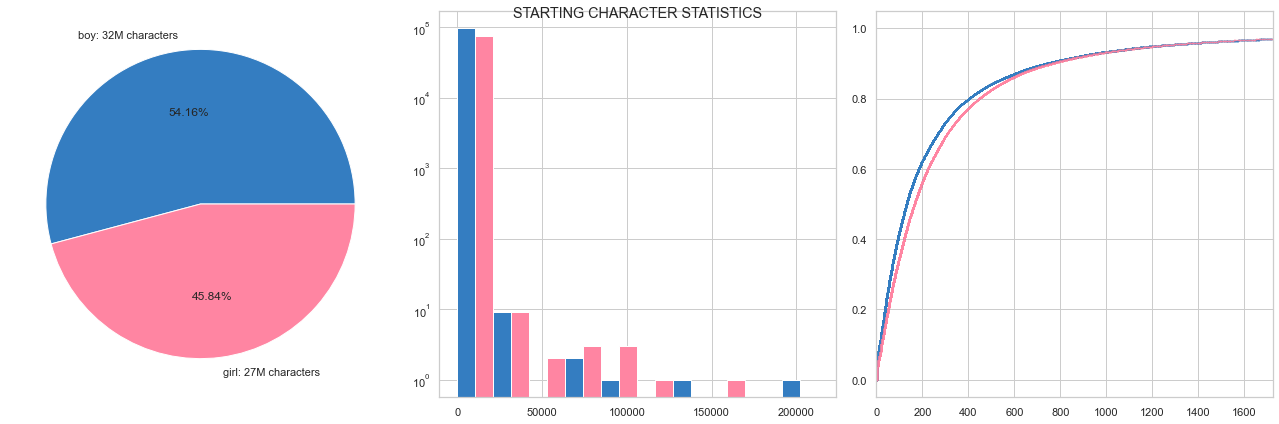

            boy      girl
count  96240.00  74305.00
mean     340.46    373.30
std     1245.62   1352.06
min        1.00      1.00
25%       49.00     66.00
50%      131.00    165.00
75%      322.00    365.00
max   212476.00 151981.00
Wall time: 1.37 s


In [13]:
%%time
filt_dict = {}
cond_dict = {}
plot_gender_character_frequency(df, col=Corpus_series, new_name='n_char', suptitle='Starting Character Statistics', alpha=0.1)

## Review number of emails that have string, character reduction
Overview:
- Create new columns for each reduction to view the character impact;
- Apply the selected filters together at the end and create a processed column;
- Remove the added columns from this notebook to keep the dataframe manageable; and,
- Output to csv;

# Apply filters
### Remove URLs

In [14]:
%%time
print(just_character_counts(df, col=Corpus_series))
returns_dict = {}
df = threadpool_executor(io_func=url_function, df=df, series=Corpus_series, merge_back='series', idict=returns_dict, new_name=None)
print(just_character_counts(df, col=Corpus_series))

60504530
60098605
Wall time: 9.07 s


### Remove Email Addresses

In [15]:
%%time
returns_dict = {}
df = threadpool_executor(io_func=email_address_function, df=df, series=Corpus_series, merge_back='series', idict=returns_dict, new_name=None)
print(just_character_counts(df, col=Corpus_series))

59910074
Wall time: 7.87 s


### Remove Colon String lines (ex. From: To: E-Mail:)

In [16]:
%%time
returns_dict = {}
df = threadpool_executor(io_func=colon_string_function, df=df, series=Corpus_series, merge_back='series', idict=returns_dict, new_name=None)
print(just_character_counts(df, col=Corpus_series))

59827802
Wall time: 26.6 s


## Ending Plot

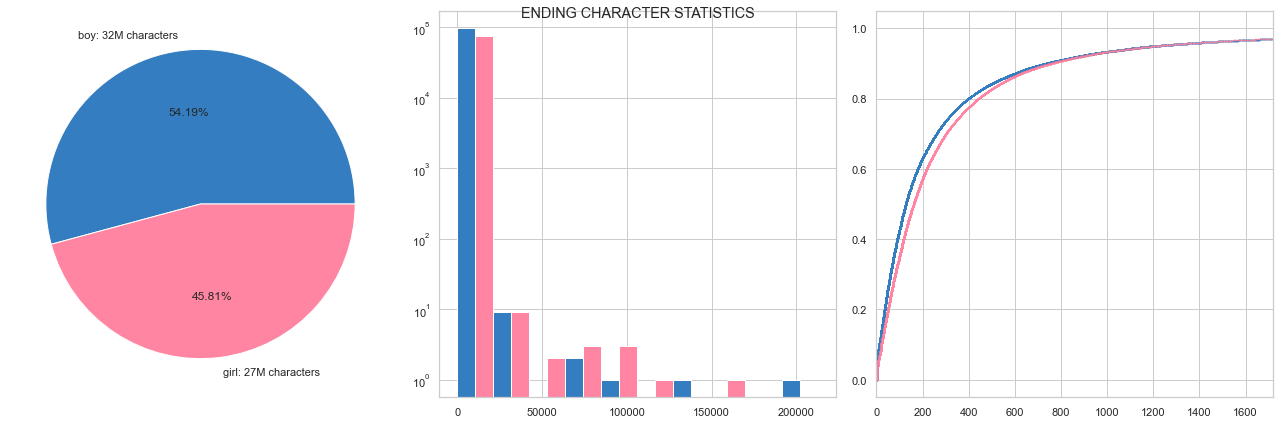

            boy      girl
count  96240.00  74305.00
mean     336.89    368.82
std     1240.44   1342.09
min        1.00      1.00
25%       47.00     65.00
50%      127.00    161.00
75%      318.00    362.00
max   212476.00 151162.00
Wall time: 1.31 s


In [17]:
%%time
ending_plot = plot_gender_character_frequency(df, col=Corpus_series, new_name='clean_char', suptitle='Ending Character Statistics', alpha=0.1)

## Clear Blanks after processing

In [18]:
df = df[df[Corpus_series] != '']

In [19]:
len(df)

170545

### Resample, reindex

In [20]:
def resample_frame(df, random_state=random_state):
    df = df.sample(n=len(df), random_state=random_state).reset_index(drop=True)
    return df
df = resample_frame(df) # resampled

### Output

In [21]:
df.to_csv('./data/enron/clean_clean_by_strings.csv')

### End

In [22]:
end_time = time.perf_counter()
print('Run time: %.1fs (~%dm)' % ((end_time-start_time, (end_time-start_time)/60)))

Run time: 67.9s (~1m)
